# Trajectory Prediction(TP) demo with Intel® Extension for PyTorch 

Intel® Extension for PyTorch* extends PyTorch* with optimizations for extra performance boost on Intel hardware. Most of the optimizations will be included in stock PyTorch* releases eventually, and the intention of the extension is to deliver up-to-date features and optimizations for PyTorch* on Intel hardware, examples include AVX-512 Vector Neural Network Instructions (AVX512 VNNI) and Intel® Advanced Matrix Extensions (Intel® AMX).

This sample contains a Jupyter* NoteBook that guides you through the process of running a PyTorch inference workload (Trajectory Prediction) on CPU by using [Intel® oneAPI AI Analytics Toolkit(AI Kit)](https://software.intel.com/content/www/us/en/develop/tools/oneapi/ai-analytics-toolkit.html) and also analyze the CPU usage via Intel® oneAPI Deep Neural Network Library (oneDNN) verbose logs.

Note: Intel® Extension for PyTorch* is available as part of Intel® AI Analytics Toolkit. For more information: See [Intel® oneAPI AI Analytics Toolkit](https://software.intel.com/content/www/us/en/develop/tools/oneapi/ai-analytics-toolkit.html)

Find more examples in the [Examples](https://intel.github.io/intel-extension-for-pytorch/cpu/latest/tutorials/examples.html) topic of the [Intel® Extension for PyTorch Documentation*](https://intel.github.io/intel-extension-for-pytorch)

#### Pipeline of Trajectory Prediction:

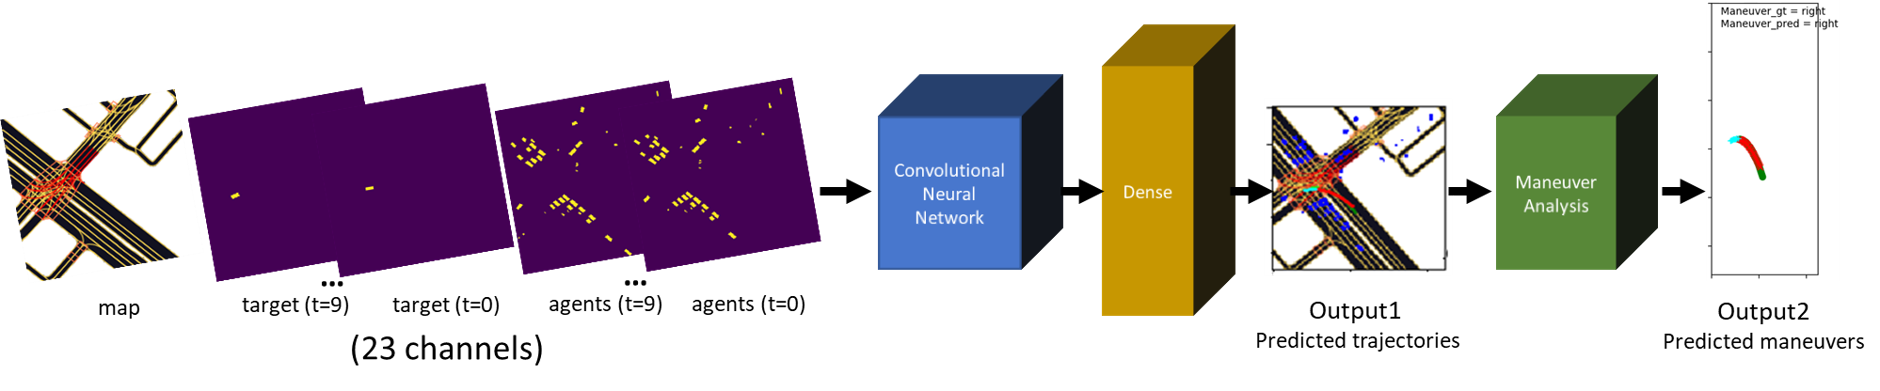



#### Steps in the demo:

1. Prepare the environment and validate it.
2. Import necessary packages, including files for data preprocessing, configuration, pretrained models, test dataset, etc.
5. Create the model and load the weights.
6. Develop TP metric functions, such as Average Displacement Error (ADE) and Final Displacement Error (FDE).
7. Build an evaluation function that parses the test dataset, obtains the results from the model, and plots the trajectories.
8. Run the application using the stock PyTorch.
9. Get profile information with stock PyTorch.
10. Run the application with various scenarios as mentioned below like using the Intel Extension for PyTorch (IPEX).
11. Get profile information with each scenario.
12. Compare the performance between stock PyTorch and other scenarios.

Following usecases would be covered in this demo alongwith Profiling:
1. Stock PyTorch env
2. Stock PyTorch env with channel-last
3. IPEX with fp32 datatype
4. IPEX with bf16 datatype using AVX512_CORE_AMX
5. IPEX-graph mode with bf16 datatype using AVX512_CORE_AMX
6. IPEX with int8 datatype using AVX512_CORE_AMX
7. Performance tuning with ipexrun



#### Dataset: LYFT (170,000 sequences)

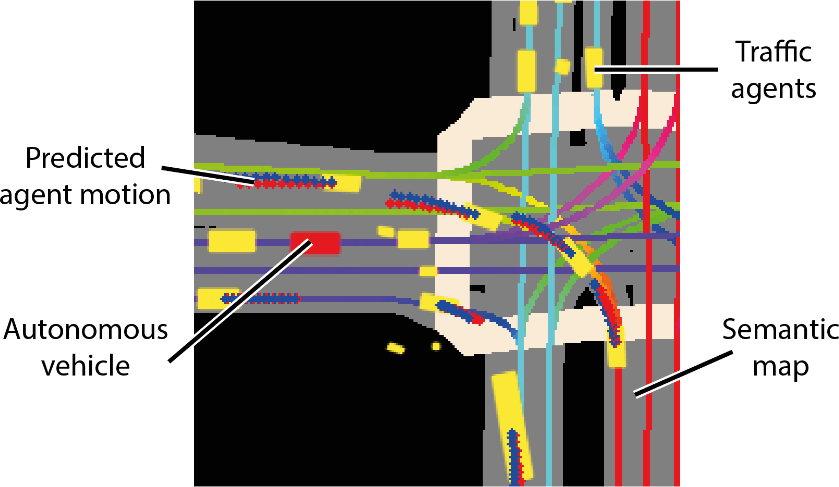


### Step 1: Prepare environment

The environment is the latest [Intel® oneAPI AI Analytics Toolkit](https://software.intel.com/content/www/us/en/develop/tools/oneapi/ai-analytics-toolkit.html) PyTorch* environment, which includes Intel® Optimizations for deep learning workflows. See [here](https://software.intel.com/content/www/us/en/develop/articles/installing-ai-kit-with-conda.html) for more installation information.

Please select Pytorch AI environment in the notebook kernel.

Additionally we will install PyTorch and Intel Extension of Pytorch using below commands, Please execute them:

In [82]:
%pip install --upgrade torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu
Note: you may need to restart the kernel to use updated packages.


In [83]:
%pip install --upgrade intel_extension_for_pytorch

Note: you may need to restart the kernel to use updated packages.


#### a. Validate the environment by doing version check

##### i. Collect Hardware info

In [84]:
%cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 143
model name	: Intel(R) Xeon(R) Platinum 8480+
stepping	: 6
microcode	: 0x2b000081
cpu MHz		: 2000.000
cache size	: 107520 KB
physical id	: 0
siblings	: 112
core id		: 0
cpu cores	: 56
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 32
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx pdpe1gb rdtscp lm constant_tsc art arch_perfmon pebs bts rep_good nopl xtopology nonstop_tsc cpuid aperfmperf tsc_known_freq pni pclmulqdq dtes64 monitor ds_cpl vmx smx est tm2 ssse3 sdbg fma cx16 xtpr pdcm pcid dca sse4_1 sse4_2 x2apic movbe popcnt tsc_deadline_timer aes xsave avx f16c rdrand lahf_lm abm 3dnowprefetch cpuid_fault epb cat_l3 cat_l2 cdp_l3 invpcid_single intel_ppin cdp_l2 ssbd mba ibrs ibpb stibp ibrs_enhanced tpr_shadow vnmi flexpriority ept vpid ept_ad fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms i

flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx pdpe1gb rdtscp lm constant_tsc art arch_perfmon pebs bts rep_good nopl xtopology nonstop_tsc cpuid aperfmperf tsc_known_freq pni pclmulqdq dtes64 monitor ds_cpl vmx smx est tm2 ssse3 sdbg fma cx16 xtpr pdcm pcid dca sse4_1 sse4_2 x2apic movbe popcnt tsc_deadline_timer aes xsave avx f16c rdrand lahf_lm abm 3dnowprefetch cpuid_fault epb cat_l3 cat_l2 cdp_l3 invpcid_single intel_ppin cdp_l2 ssbd mba ibrs ibpb stibp ibrs_enhanced tpr_shadow vnmi flexpriority ept vpid ept_ad fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid cqm rdt_a avx512f avx512dq rdseed adx smap avx512ifma clflushopt clwb intel_pt avx512cd sha_ni avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves cqm_llc cqm_occup_llc cqm_mbm_total cqm_mbm_local split_lock_detect avx_vnni avx512_bf16 wbnoinvd dtherm ida arat pln pts hwp hwp_act_window hwp_epp hwp_pkg_req avx512vbmi umip pku ospke w

flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx pdpe1gb rdtscp lm constant_tsc art arch_perfmon pebs bts rep_good nopl xtopology nonstop_tsc cpuid aperfmperf tsc_known_freq pni pclmulqdq dtes64 monitor ds_cpl vmx smx est tm2 ssse3 sdbg fma cx16 xtpr pdcm pcid dca sse4_1 sse4_2 x2apic movbe popcnt tsc_deadline_timer aes xsave avx f16c rdrand lahf_lm abm 3dnowprefetch cpuid_fault epb cat_l3 cat_l2 cdp_l3 invpcid_single intel_ppin cdp_l2 ssbd mba ibrs ibpb stibp ibrs_enhanced tpr_shadow vnmi flexpriority ept vpid ept_ad fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid cqm rdt_a avx512f avx512dq rdseed adx smap avx512ifma clflushopt clwb intel_pt avx512cd sha_ni avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves cqm_llc cqm_occup_llc cqm_mbm_total cqm_mbm_local split_lock_detect avx_vnni avx512_bf16 wbnoinvd dtherm ida arat pln pts hwp hwp_act_window hwp_epp hwp_pkg_req avx512vbmi umip pku ospke w

##### ii. Collect Software info

In [85]:
import torch.utils.collect_env as environ

print(environ.main())

PyTorch version: 2.0.1+cpu
Is debug build: False
CUDA used to build PyTorch: None
ROCM used to build PyTorch: N/A

OS: Ubuntu 22.04.1 LTS (x86_64)
GCC version: (Ubuntu 11.3.0-1ubuntu1~22.04.1) 11.3.0
Clang version: Could not collect
CMake version: version 3.22.1
Libc version: glibc-2.35

Python version: 3.9.17 (main, Jul  5 2023, 20:41:20)  [GCC 11.2.0] (64-bit runtime)
Python platform: Linux-5.15.0-57-generic-x86_64-with-glibc2.35
Is CUDA available: False
CUDA runtime version: No CUDA
CUDA_MODULE_LOADING set to: N/A
GPU models and configuration: No CUDA
Nvidia driver version: No CUDA
cuDNN version: No CUDA
HIP runtime version: N/A
MIOpen runtime version: N/A
Is XNNPACK available: True

CPU:
Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Address sizes:                   52 bits physical, 57 bits virtual
Byte Order:                      Little Endian
CPU(s):                          224
On-line CPU(s) list:             0-223
Vendor ID:           

### Step 2: Import necessary packages

1. config_devcloud package contains common variables shared across multiple files like dataset_path, image_size etc.
2. resnet50_dropout_devcloud package contains resnet50 model with dropout embedded after each convolution layer
3. dataset_devcloud preprocesses the LYFT dataset and create test dataloader
4. plot_trajectory_devcloud contains plotting function to plot trajectories.


In [86]:
# ignore all warning messages
import warnings
warnings.filterwarnings('ignore')

import os
import config_devcloud as config

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import time

# import config_devcloud as config
from resnet50_dropout_devcloud import resnet50
from dataset_devcloud import test_loader
from plot_trajectory_devcloud import trajectories_plot

sequence_length = config.SEQ_LENGTH
past_trajectory = config.HISTORY
history_frames = past_trajectory*2 + 3
total_maneuvers = ["none", "straight", "right", "left"]

print("sequence_length", sequence_length)
print("past_trajectory", past_trajectory)
print("Future prediction", sequence_length - past_trajectory)

np.random.seed(config.seed)
torch.manual_seed(config.seed)

print(config.DEVICE)

sequence_length 41
past_trajectory 11
Future prediction 30
cpu


### Step 5: Create Trajectory Prediction Model based on Resnet-50 architecture

ResNet-50 is a convolutional neural network that is 50 layers deep (48 convolutional layers, one MaxPool layer, and one average pool layer). This network is fine-tuned on LYFT dataset. The network has an image input size of 224 x 224 x channels.

##### a. Build model

In [87]:
# Model Creation
def build_model() -> torch.nn.Module:
    # load pre-trained Conv2D model
    # '''
    model = resnet50(pretrained=False, p=config.dropout_prob)

    # change input channels number to match the rasterizer's output
    num_in_channels = 3 + (2*past_trajectory)

    model.conv1 = nn.Conv2d(
        num_in_channels,
        model.conv1.out_channels,
        kernel_size=model.conv1.kernel_size,
        stride=model.conv1.stride,
        padding=model.conv1.padding,
        bias=False,
    )
    # change output size to (X, Y) * number of future states

    if config.future_prediction > 0:
        num_targets = 2 * config.future_prediction
    else:
        num_targets = 2 * (sequence_length - past_trajectory)

    model.fc = nn.Linear(in_features=2048, out_features=num_targets)

    return model
    

class WrappedModel(nn.Module):
	def __init__(self, module):
		super(WrappedModel, self).__init__()
		self.module = module # that I actually define.
	def forward(self, x):
		return self.module(x)

##### b. get_model() function to load Pretrained weights in the network

We fine-tuned Resnet-50 architecture with LYFT dataset and stored the model weights in the file: best_epoch_MSE_.pth

In [88]:
def get_model():

    model_path = "best_epoch_MSE_.pth"

    model = build_model().to(config.DEVICE)
    model = WrappedModel(model) #the model was trained on gpu with dataparallel,, need to add this to run on cpu.

    # # load the model checkpoint
    print('Loading checkpoint')
    # checkpoint = torch.load(config.model_path, map_location=config.DEVICE)
    checkpoint = torch.load(model_path, map_location=config.DEVICE)

    model_epoch = checkpoint['epoch']
    # load model weights state_dict
    model.load_state_dict(checkpoint['model_state_dict'])#, strict=False) # Error(s) in loading state_dict for ResNet: -> added strict-False
    print('Loaded checkpoint at epoch', model_epoch)

    model.eval()
    
    return model

### Step 6. Metric: Average displacement error (ADE) & Final displacement Error (FDE)

Average Displacement Error (ADE): The average of the root mean squared error (RMSE) between the ground truth and the predicted trajectory position at every time frame for the entire sequence.
Final Displacement Error (FDE): FDE means the distance between the predicted final destination and the true final destination.

In [90]:
def calculate_ade(outputs, targets):

    displacement = np.linalg.norm(outputs - targets, axis=1) 
    ade = np.mean(displacement)   
    return ade

def calculate_fde(outputs, targets):

    fde = np.linalg.norm(outputs[outputs.shape[0]-1] - targets[outputs.shape[0]-1])
    return fde

### Step 7. Evaluate function for predicting trajectories on test_dataloader

In this function, we will time the model execution on the given dataset, computer ADE & FDE and plot the trajectories for visualization.

In [91]:

def evaluate(model, dataloader, ade_list, fde_list, f, plot_figures, mixedprecision, channel_last, IPEX):

    test_time_list = []

    with torch.no_grad():

        for i, data in enumerate(dataloader):

            # data = data.to(memory_format=torch.channels_last)

            image, keypoints, availability, seq_id, image_agent, centroid_current, history_traj, history_traj_availability = data['image'].to(config.DEVICE), torch.squeeze(data['keypoints'].to(config.DEVICE)), torch.squeeze(data['availability'].to(config.DEVICE)), torch.squeeze(data['seq_id'].to(config.DEVICE)), torch.squeeze(data['current_agent_i'].to(config.DEVICE)), torch.squeeze(data['centroid_current'].to(config.DEVICE)), torch.squeeze(data['history_traj'].to(config.DEVICE)), torch.squeeze(data['history_traj_availability'].to(config.DEVICE))

            # flatten the keypoints
            keypoints = keypoints.view(keypoints.size(0), -1)
            keypoints = keypoints.detach().cpu().numpy()
            keypoints = ((keypoints + 1)/2)*int(config.IMAGE_SIZE)

            availability = availability.view(availability.size(0), -1)
            availability = availability.detach().cpu().numpy()

            history_traj = history_traj.view(history_traj.size(0), -1)
            history_traj_availability = history_traj_availability.view(history_traj_availability.size(0), -1)
            image_agent = image_agent.detach().cpu().numpy()
            centroid_current = centroid_current.detach().cpu().numpy()
            history_traj = history_traj.detach().cpu().numpy()
            history_traj_availability = history_traj_availability.detach().cpu().numpy()

            if channel_last and (not IPEX):
                model = model.to(memory_format=torch.channels_last)
                image = image.to(memory_format=torch.channels_last)

            # outputs, _ = model.forward(image)
            t1 = time.time()

            with torch.autograd.profiler_legacy.profile() as prof:
                if mixedprecision:
                    with torch.cpu.amp.autocast():
                        outputs, _ = model(image) #outputs=model(image).reshape(keypoints.shape)-->since we flattened the keypoints, no need for reshaping
                else:
                    outputs, _ = model(image) #outputs=model(image).reshape(keypoints.shape)-->since we flattened the keypoints, no need for reshaping

            test_time = time.time() - t1

            test_time_list.append(test_time)

            outputs = outputs.view(keypoints.shape[0], -1)
            outputs = outputs.detach().cpu().numpy()
            outputs = ((outputs + 1)/2)*int(config.IMAGE_SIZE)
            outputs = outputs[np.where(availability == 1)]
    
            image = image.detach().cpu().numpy()

            keypoints = keypoints[np.where(availability == 1)]
            keypoints = keypoints.reshape(-1,2)

            history_traj = history_traj[np.where(history_traj_availability == 1)]
            history_traj = history_traj.reshape(-1,2)

            # outputs_mean = np.asarray(outputs_list[0])
            outputs = outputs.reshape(-1,2)
            
            ade = calculate_ade(outputs, keypoints) * config.IMAGE_FACTOR
            fde = calculate_fde(outputs, keypoints) * config.IMAGE_FACTOR

            ade_list.append(ade)
            fde_list.append(fde)

            print("seq_id, ADE(px), FDE(px) = ", seq_id.item(), ade, fde)
            f.write(str(seq_id.item())+","+str(ade)+","+str(fde)+"\n")

            trajectories_plot(image, outputs, keypoints, seq_id.item(), image_agent, ade, fde, history_traj, plot_figures)

        return ade_list, fde_list, test_time_list, prof


### Step 8: Run with Stock PyTorch

In [92]:
model = get_model()

# os.environ["DNNL_VERBOSE"] = "1"
# os.environ["ONEDNN_MAX_CPU_ISA"] = "AVX512_CORE_VNNI"

#warmup steps for stock pytorch
resnet_data = torch.rand(1, 25, 224, 224)
for x in range(20):
    model(resnet_data)

Loading checkpoint
Loaded checkpoint at epoch 261


seq_id, ADE(px), FDE(px) =  6666201 1.6432664394378662 3.1724982261657715


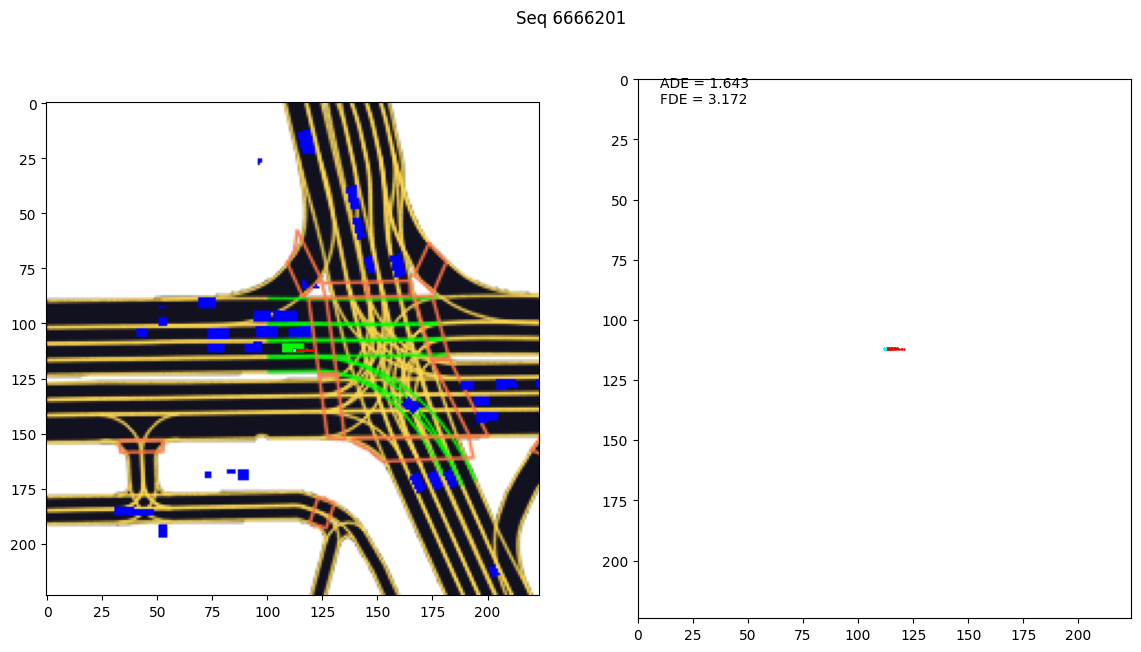

seq_id, ADE(px), FDE(px) =  7067796 2.5629751682281494 5.548815727233887


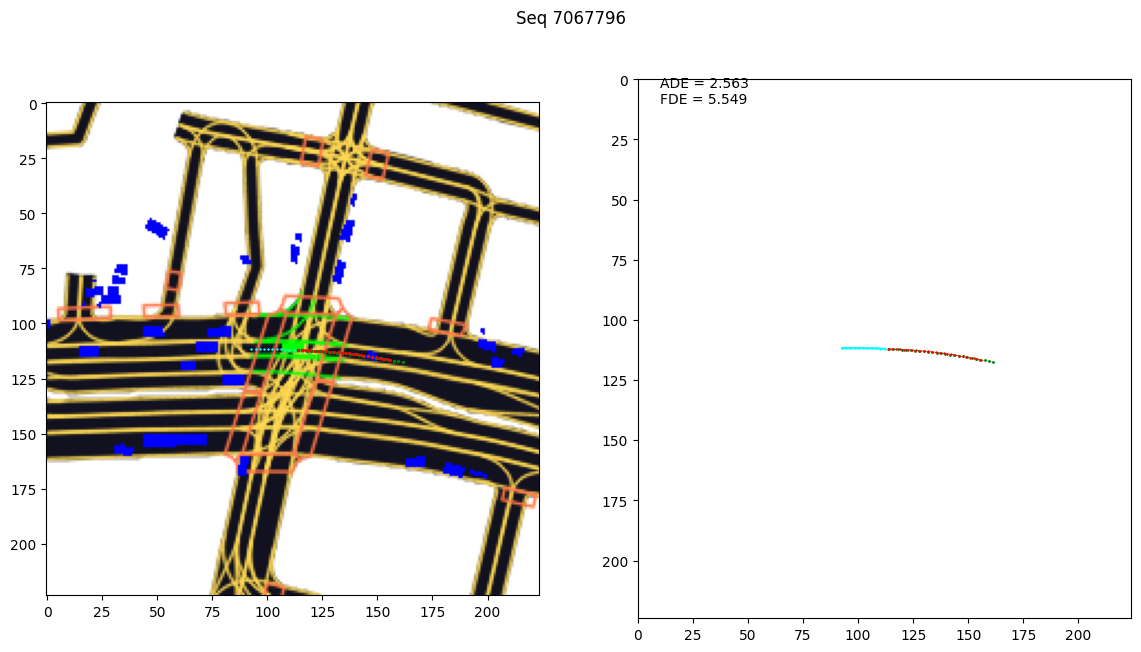

seq_id, ADE(px), FDE(px) =  7965952 1.7341426610946655 4.608952522277832


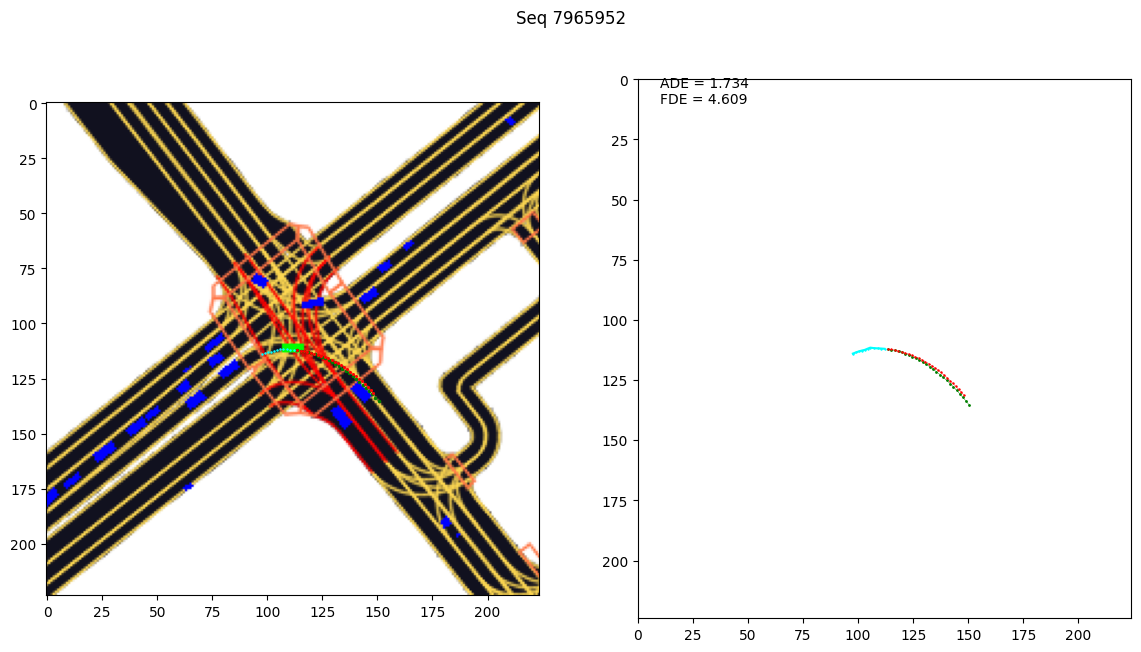

seq_id, ADE(px), FDE(px) =  19675067 1.8078818321228027 2.228386640548706


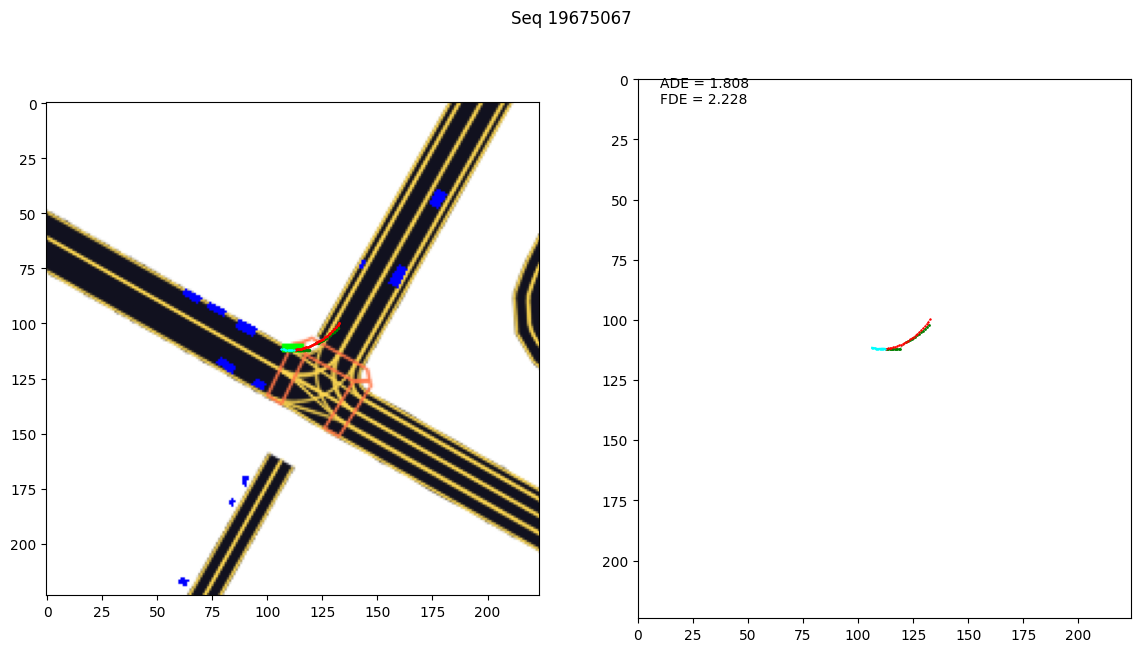

seq_id, ADE(px), FDE(px) =  3316941 1.1266287565231323 2.955801486968994


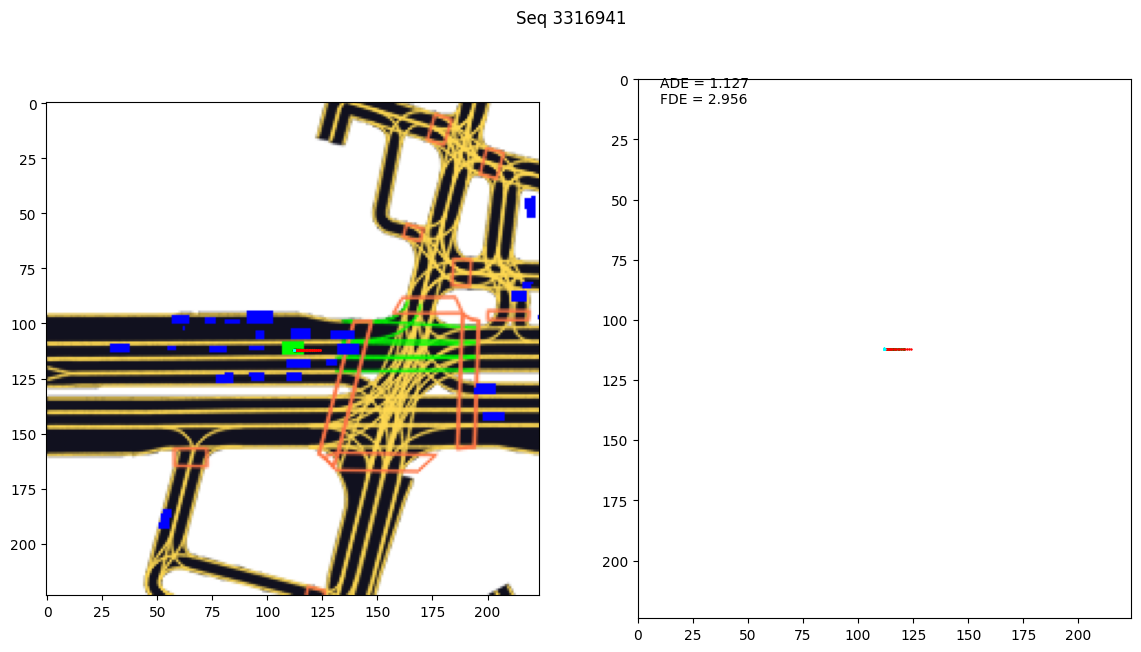

seq_id, ADE(px), FDE(px) =  21126357 0.34190690517425537 1.1271122694015503


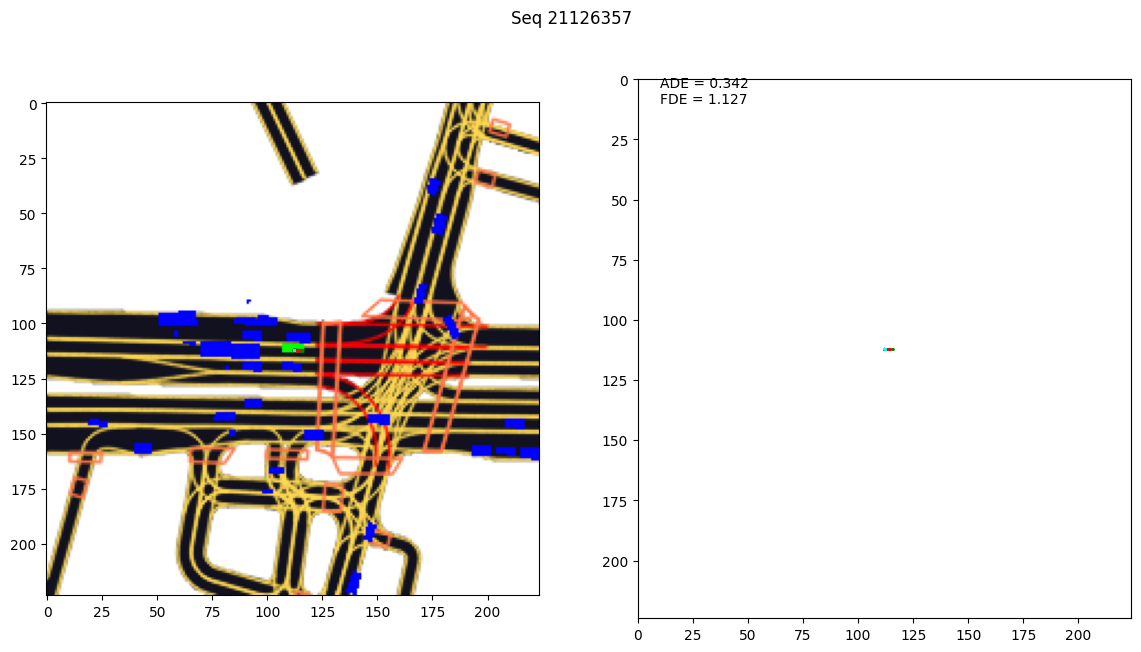

seq_id, ADE(px), FDE(px) =  22293277 0.5884649157524109 0.44820624589920044


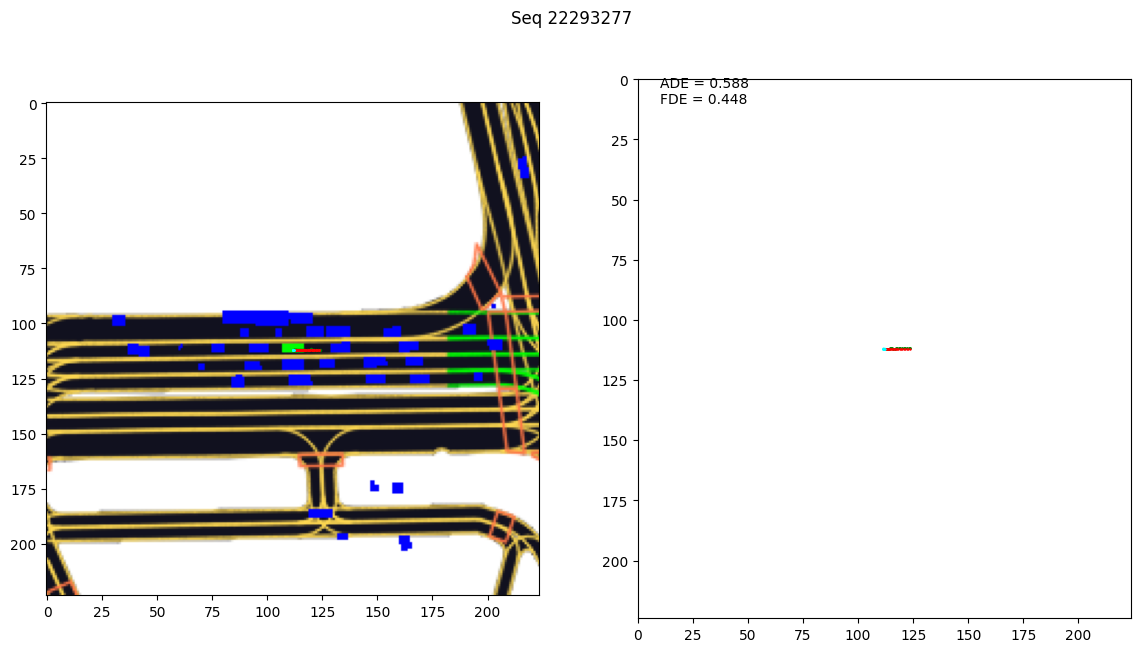

seq_id, ADE(px), FDE(px) =  17257679 1.4550316333770752 2.4082677364349365


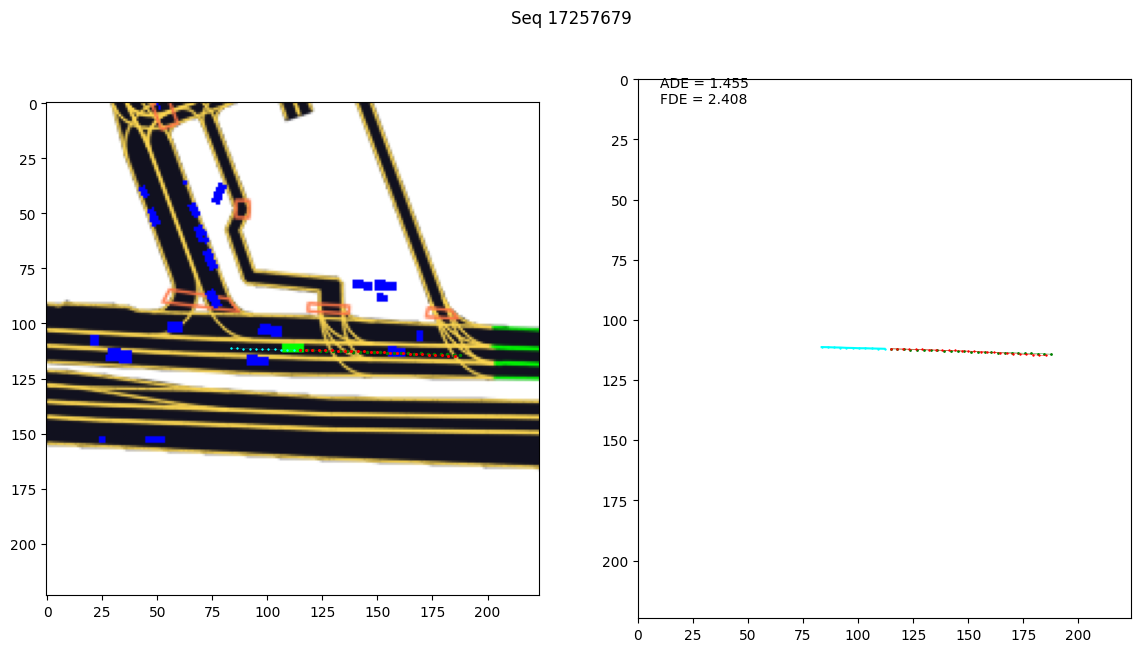

seq_id, ADE(px), FDE(px) =  1440372 2.7157323360443115 5.661510944366455


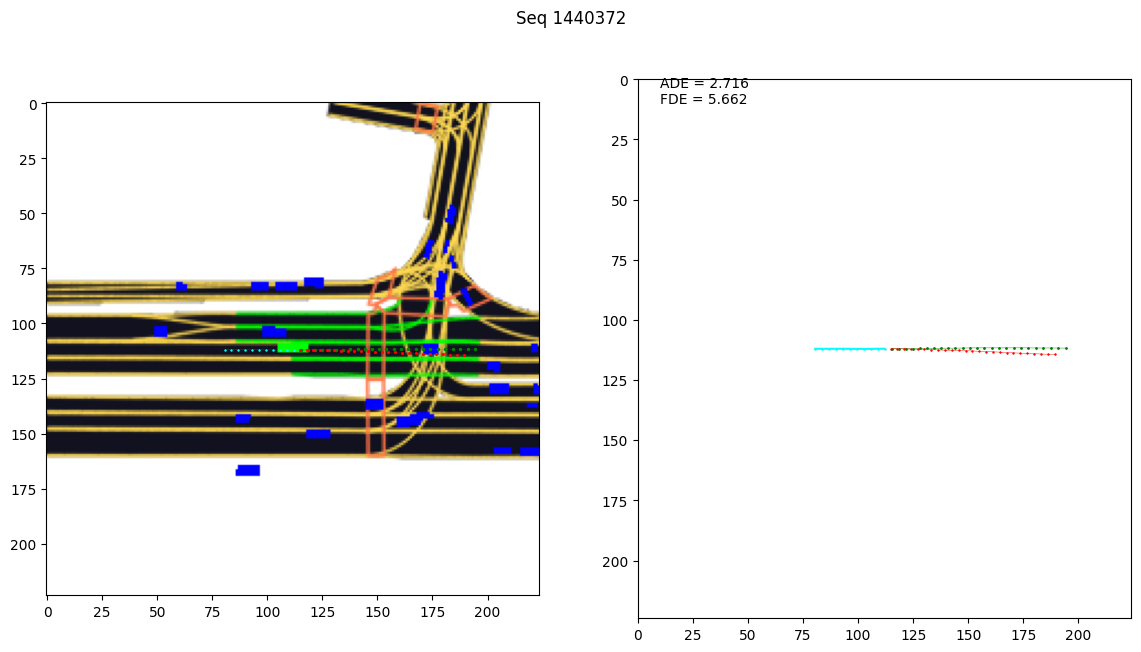

total_ADE(in pixels) = 1.5528922941949632
total_FDE(in pixels) = 3.128839088810815


In [94]:
ade_list = []
fde_list = []

f=open(f"{config.plots}/ade-fde.txt","w+")
f.write("seq_id,ade,fde\n")

plot_figures = True
mixedprecision = False
channel_last = False
IPEX = False

# validatioon function
ade_list, fde_list, test_time_list_no_ipex, prof_pytorch = evaluate(model, test_loader, ade_list, fde_list, f, plot_figures, mixedprecision, channel_last, IPEX)

f.write("total_ADE =" + str(sum(ade_list)/len(ade_list)) +"\n")
f.write("total_FDE =" + str(sum(fde_list)/len(fde_list)) +"\n")
# f.write("total_model_time =" + str(sum(test_time_list_no_ipex)/len(test_time_list_no_ipex)) +"\n")

print("total_ADE(in pixels) =", sum(ade_list)/len(ade_list))
print("total_FDE(in pixels) =", sum(fde_list)/len(fde_list))
# print("total_model_time(s) =", sum(test_time_list_no_ipex)/len(test_time_list_no_ipex))

total_ADE = sum(ade_list)/len(ade_list)
time_pytorch=prof_pytorch.self_cpu_time_total/1000
# print(time_pytorch)

f.close()

#### Get Profiling information with stock PyTorch

In [95]:
print(prof_pytorch.key_averages().table(sort_by='self_cpu_time_total'))

----------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                              Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
----------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
          aten::mkldnn_convolution        94.41%     100.964ms        94.71%     101.278ms       1.911ms            53  
           aten::native_batch_norm         1.99%       2.130ms         2.33%       2.492ms      47.024us            53  
                  aten::clamp_min_         1.21%       1.292ms         1.21%       1.292ms      26.369us            49  
                        aten::add_         0.57%     611.715us         0.57%     611.715us      38.232us            16  
                       aten::empty         0.55%     585.938us         0.55%     585.938us       1.379us           425  
     aten::max_pool2d_with_indic

#### Export to Chrome Trace (chrome://tracing)

In [96]:
prof_pytorch.export_chrome_trace("trace_file_pytorch.json")

### Step 9: Run with Stock PyTorch & channel_last = True


In [97]:
model = get_model()

# os.environ["DNNL_VERBOSE"] = "1"
# os.environ["ONEDNN_MAX_CPU_ISA"] = "AVX512_CORE_VNNI"

#warmup steps for stock pytorch
resnet_data = torch.rand(1, 25, 224, 224)
for x in range(20):
    model(resnet_data)

Loading checkpoint
Loaded checkpoint at epoch 261


In [98]:
ade_list = []
fde_list = []

f=open(f"{config.plots}/ade-fde.txt","w+")
f.write("seq_id,ade,fde\n")

plot_figures = False
mixedprecision = False
channel_last = True
IPEX = False

# validatioon function
ade_list, fde_list, test_time_list_no_ipex_c, prof_pytorch_c = evaluate(model, test_loader, ade_list, fde_list, f, plot_figures, mixedprecision, channel_last, IPEX)

f.write("total_ADE =" + str(sum(ade_list)/len(ade_list)) +"\n")
f.write("total_FDE =" + str(sum(fde_list)/len(fde_list)) +"\n")
# f.write("total_model_time =" + str(sum(test_time_list_no_ipex_c)/len(test_time_list_no_ipex_c)) +"\n")

print("total_ADE(in pixels) =", sum(ade_list)/len(ade_list))
print("total_FDE(in pixels) =", sum(fde_list)/len(fde_list))
# print("total_model_time(s) =", sum(test_time_list_no_ipex_c)/len(test_time_list_no_ipex_c))

total_ADE_c = sum(ade_list)/len(ade_list)
time_pytorch_c=prof_pytorch_c.self_cpu_time_total/1000
# print(time_pytorch_c)

f.close()

seq_id, ADE(px), FDE(px) =  6666201 1.6432673931121826 3.1724982261657715
seq_id, ADE(px), FDE(px) =  7067796 2.5629754066467285 5.548818111419678
seq_id, ADE(px), FDE(px) =  7965952 1.7341445684432983 4.608952522277832
seq_id, ADE(px), FDE(px) =  19675067 1.8078830242156982 2.228389263153076
seq_id, ADE(px), FDE(px) =  3316941 1.12662935256958 2.9558169841766357
seq_id, ADE(px), FDE(px) =  21126357 0.3419083058834076 1.1271122694015503
seq_id, ADE(px), FDE(px) =  22293277 0.5884669423103333 0.44820624589920044
seq_id, ADE(px), FDE(px) =  17257679 1.4550303220748901 2.4082529544830322
seq_id, ADE(px), FDE(px) =  1440372 2.715731620788574 5.661503314971924
total_ADE(in pixels) = 1.5528929928938549
total_FDE(in pixels) = 3.1288388768831887


#### Get Profiling information with stock PyTorch & channel_last = True

In [99]:
print(prof_pytorch_c.key_averages().table(sort_by='self_cpu_time_total'))

----------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                              Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
----------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
          aten::mkldnn_convolution        89.33%      51.752ms        89.58%      51.899ms     979.234us            53  
           aten::native_batch_norm         4.09%       2.370ms         4.94%       2.861ms      53.984us            53  
                  aten::clamp_min_         2.29%       1.329ms         2.29%       1.329ms      27.118us            49  
                        aten::add_         1.03%     596.043us         1.03%     596.043us      37.253us            16  
                       aten::empty         0.88%     511.918us         0.88%     511.918us       1.376us           372  
                aten::_convoluti

#### Export to Chrome Trace (chrome://tracing)

In [100]:
prof_pytorch_c.export_chrome_trace("trace_file_pytorch_c.json")

#### Compare Latency (Batch-size 1)

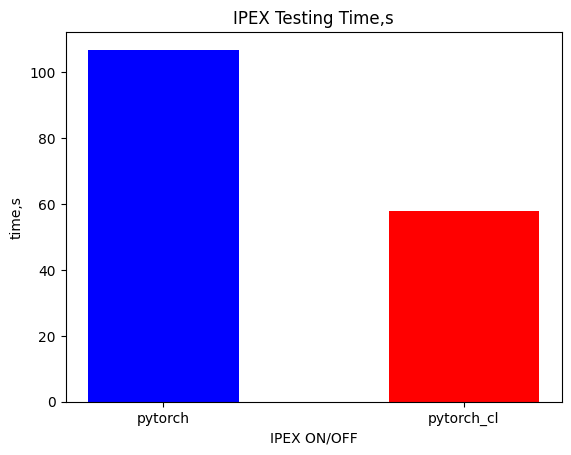

In [101]:
pred_times = [time_pytorch, time_pytorch_c]
tick_label = ['pytorch', 'pytorch_cl']

left = [1,2]
plt.bar(left, pred_times, tick_label = tick_label, width = 0.5, color = ['blue', 'red'])
plt.xlabel('IPEX ON/OFF'); plt.ylabel('time,s'); plt.title('IPEX Testing Time,s')
plt.show()

# print("Performance Speedup Testing: ",(time_test)/(time_pytorch_c))

#### Check Accuracy

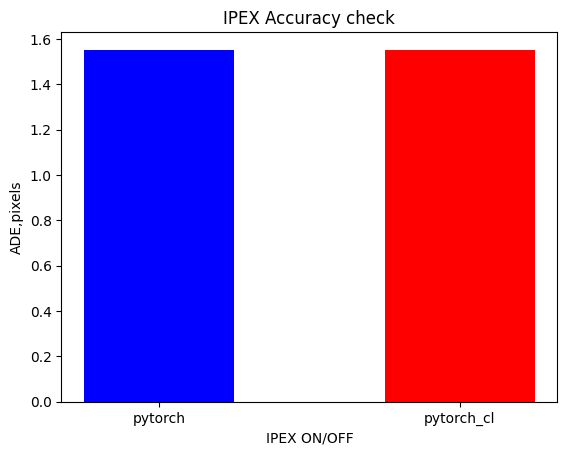

In [102]:
#show accuracy difference
accuracy_diff = [total_ADE, total_ADE_c]
tick_label = ['pytorch', 'pytorch_cl']

left = [1,2]
plt.bar(left, accuracy_diff, tick_label = tick_label, width = 0.5, color = ['blue', 'red'])
plt.xlabel('IPEX ON/OFF'); plt.ylabel('ADE,pixels'); plt.title('IPEX Accuracy check')
plt.show()

### Optimize with Intel Extension for Pytorch

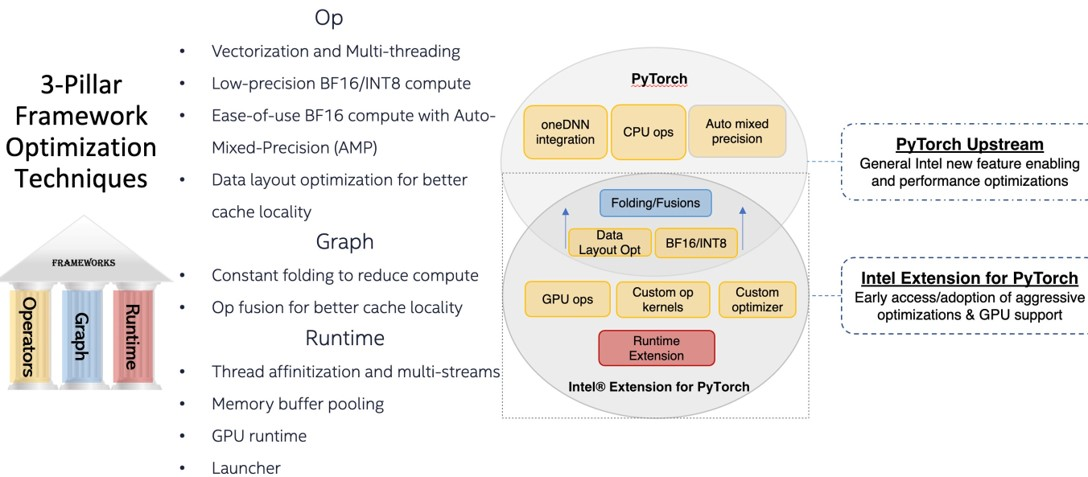

### Step 10: Run with Intel Extension for PyTorch (IPEX) with float32 dataprecision (Default):

In [103]:
model = get_model()

# os.environ["DNNL_VERBOSE"] = "1"
# os.environ["ONEDNN_MAX_CPU_ISA"] = "AVX512_CORE_VNNI"

#with IPEX
import intel_extension_for_pytorch as ipex
model_ipex = ipex.optimize(model, dtype=torch.float32)

for x in range(20):
    model_ipex(resnet_data)

Loading checkpoint
Loaded checkpoint at epoch 261


In [104]:
ade_list = []
fde_list = []

f=open(f"{config.plots}/ade-fde.txt","w+")
f.write("seq_id,ade,fde\n")

plot_figures = False
mixedprecision = False
IPEX = True

# validatioon function
ade_list, fde_list, test_time_list_ipex_fp32, prof_pytorch_ipex_fp32 = evaluate(model_ipex, test_loader, ade_list, fde_list, f, plot_figures, mixedprecision, channel_last, IPEX)

f.write("total_ADE =" + str(sum(ade_list)/len(ade_list)) +"\n")
f.write("total_FDE =" + str(sum(fde_list)/len(fde_list)) +"\n")
# f.write("total_model_time =" + str(sum(test_time_list_ipex_fp32)/len(test_time_list_ipex_fp32)) +"\n")

print("total_ADE(in pixels) =", sum(ade_list)/len(ade_list))
print("total_FDE(in pixels) =", sum(fde_list)/len(fde_list))
# print("total_model_time(s) =", sum(test_time_list_ipex_fp32)/len(test_time_list_ipex_fp32))

total_ADE_fp32 = sum(ade_list)/len(ade_list)
time_ipex_fp32=prof_pytorch_ipex_fp32.self_cpu_time_total/1000

f.close()

seq_id, ADE(px), FDE(px) =  6666201 1.6432689428329468 3.172513484954834
seq_id, ADE(px), FDE(px) =  7067796 2.5629751682281494 5.548815727233887
seq_id, ADE(px), FDE(px) =  7965952 1.7341419458389282 4.608952522277832
seq_id, ADE(px), FDE(px) =  19675067 1.8078827857971191 2.228386640548706
seq_id, ADE(px), FDE(px) =  3316941 1.12662935256958 2.9558169841766357
seq_id, ADE(px), FDE(px) =  21126357 0.34190690517425537 1.1271122694015503
seq_id, ADE(px), FDE(px) =  22293277 0.5884669423103333 0.44820624589920044
seq_id, ADE(px), FDE(px) =  17257679 1.455032229423523 2.4082677364349365
seq_id, ADE(px), FDE(px) =  1440372 2.7157318592071533 5.6615166664123535
total_ADE(in pixels) = 1.5528929034868877
total_FDE(in pixels) = 3.1288431419266596


#### Get Profiling information with IPEX-fp32

In [105]:
print(prof_pytorch_ipex_fp32.key_averages().table(sort_by='self_cpu_time_total'))

----------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                    Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
----------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
    torch_ipex::convolution_forward_impl        89.41%      34.014ms        90.36%      34.374ms     648.575us            53  
                        aten::clamp_min_         4.39%       1.671ms         4.39%       1.671ms      34.100us            49  
                               aten::add         3.12%       1.185ms         3.12%       1.185ms      74.072us            16  
                             aten::copy_         0.60%     228.276us         0.60%     228.276us     228.276us             1  
                             aten::empty         0.58%     222.027us         0.58%     222.027us       2.018us 

#### Export to Chrome Trace (chrome://tracing)

In [106]:
prof_pytorch_ipex_fp32.export_chrome_trace("trace_file_pytorch_ipex_fp32.json")

#### Compare Latency (Batch-size 1)

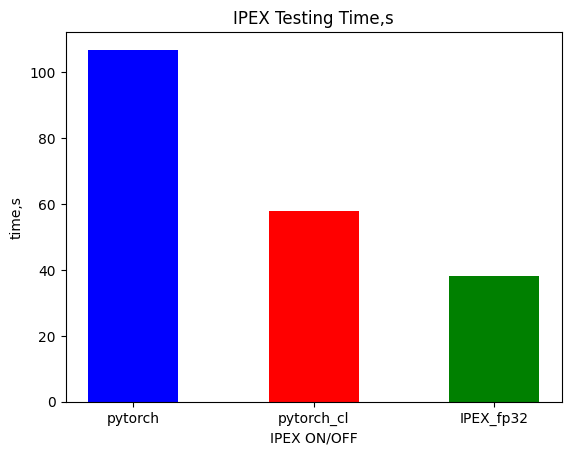

In [107]:
#show performance boost
# time_no_ipex = sum(test_time_list_no_ipex)/len(test_time_list_no_ipex)
# time_no_ipex_c = sum(test_time_list_no_ipex_c)/len(test_time_list_no_ipex_c)
# time_ipex_fp32 = sum(test_time_list_ipex_fp32)/len(test_time_list_ipex_fp32)
# time_ipex_bf16 = sum(test_time_list_ipex_bf16)/len(test_time_list_ipex_bf16)
# time_ipex_bf16_graph = sum(test_time_list_ipex_bf16_graph)/len(test_time_list_ipex_bf16_graph)
# time_ipex_int8 = sum(test_time_list_ipex_in8)/len(test_time_list_ipex_in8)

pred_times = [time_pytorch, time_pytorch_c, time_ipex_fp32]
tick_label = ['pytorch', 'pytorch_cl', 'IPEX_fp32']

left = [1,2,3]
plt.bar(left, pred_times, tick_label = tick_label, width = 0.5, color = ['blue', 'red', 'green'])
plt.xlabel('IPEX ON/OFF'); plt.ylabel('time,s'); plt.title('IPEX Testing Time,s')
plt.show()

# print("Performance Speedup Testing: ",(time_test)/(time_test_ipex))

#### Compare Accuracy

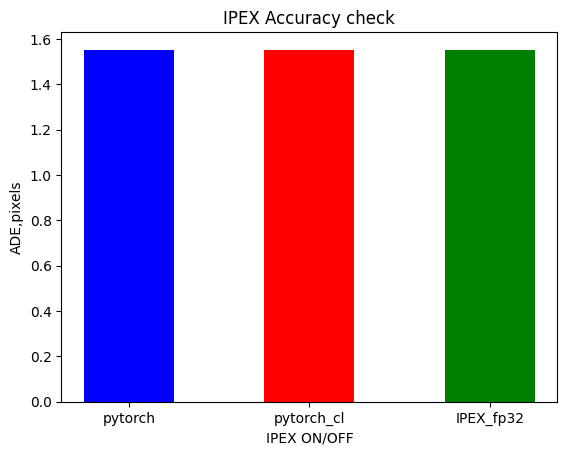

In [108]:
#show accuracy difference
accuracy_diff = [total_ADE, total_ADE_c, total_ADE_fp32]
tick_label = ['pytorch', 'pytorch_cl', 'IPEX_fp32']

left = [1,2,3]
plt.bar(left, accuracy_diff, tick_label = tick_label, width = 0.5, color = ['blue', 'red', 'green'])
plt.xlabel('IPEX ON/OFF'); plt.ylabel('ADE,pixels'); plt.title('IPEX Accuracy check')
plt.show()

### Step 11: Run with Intel Extension for PyTorch (IPEX) with bfloat16 dataprecision:

In [110]:
model = get_model()

# os.environ["DNNL_VERBOSE"] = "1"
# os.environ["ONEDNN_MAX_CPU_ISA"] = "AVX512_CORE_VNNI"

#with IPEX
import intel_extension_for_pytorch as ipex
model_ipex = ipex.optimize(model, dtype=torch.bfloat16)

with torch.no_grad():
    with torch.cpu.amp.autocast():
        for x1 in range(20):
            model_ipex(resnet_data)


Loading checkpoint
Loaded checkpoint at epoch 261


In [111]:
ade_list = []
fde_list = []

f=open(f"{config.plots}/ade-fde.txt","w+")
f.write("seq_id,ade,fde\n")

plot_figures = False
mixedprecision = True
IPEX = True

# validatioon function
ade_list, fde_list, test_time_list_ipex_bf16, prof_pytorch_ipex_bf16 = evaluate(model_ipex, test_loader, ade_list, fde_list, f, plot_figures, mixedprecision, channel_last, IPEX)

f.write("total_ADE =" + str(sum(ade_list)/len(ade_list)) +"\n")
f.write("total_FDE =" + str(sum(fde_list)/len(fde_list)) +"\n")
# f.write("total_model_time =" + str(sum(test_time_list_ipex_bf16)/len(test_time_list_ipex_bf16)) +"\n")

print("total_ADE(in pixels) =", sum(ade_list)/len(ade_list))
print("total_FDE(in pixels) =", sum(fde_list)/len(fde_list))
# print("total_model_time(s) =", sum(test_time_list_ipex_bf16)/len(test_time_list_ipex_bf16))

total_ADE_bf16 = sum(ade_list)/len(ade_list)
time_ipex_bf16=prof_pytorch_ipex_bf16.self_cpu_time_total/1000

f.close()

seq_id, ADE(px), FDE(px) =  6666201 1.6480613946914673 3.1842002868652344
seq_id, ADE(px), FDE(px) =  7067796 2.580368995666504 5.69028902053833
seq_id, ADE(px), FDE(px) =  7965952 1.736291766166687 4.705589294433594
seq_id, ADE(px), FDE(px) =  19675067 1.8070933818817139 2.2367660999298096
seq_id, ADE(px), FDE(px) =  3316941 1.103642225265503 2.8593802452087402
seq_id, ADE(px), FDE(px) =  21126357 0.3413276672363281 1.1352672576904297
seq_id, ADE(px), FDE(px) =  22293277 0.5852636694908142 0.4880145192146301
seq_id, ADE(px), FDE(px) =  17257679 1.466245174407959 2.546072244644165
seq_id, ADE(px), FDE(px) =  1440372 2.731598138809204 5.586955547332764
total_ADE(in pixels) = 1.555543601512909
total_FDE(in pixels) = 3.1591705017619662


#### Get Profiling information with IPEX-bf16

In [112]:
print(prof_pytorch_ipex_bf16.key_averages().table(sort_by='self_cpu_time_total'))

----------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                    Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
----------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
    torch_ipex::convolution_forward_impl        82.94%      21.264ms        84.06%      21.552ms     406.648us            53  
                        aten::clamp_min_         8.32%       2.133ms         8.32%       2.133ms      43.528us            49  
                               aten::add         4.09%       1.047ms         4.09%       1.047ms      65.461us            16  
                             aten::empty         0.86%     219.676us         0.86%     219.676us       1.997us           110  
         torch_ipex::convolution_forward         0.75%     193.560us       171.56%      43.984ms     411.067us 

#### Export to Chrome Trace (chrome://tracing)

In [113]:
prof_pytorch_ipex_bf16.export_chrome_trace("trace_file_pytorch_ipex_bf16.json")

#### Compare Latency (Batch-size 1)

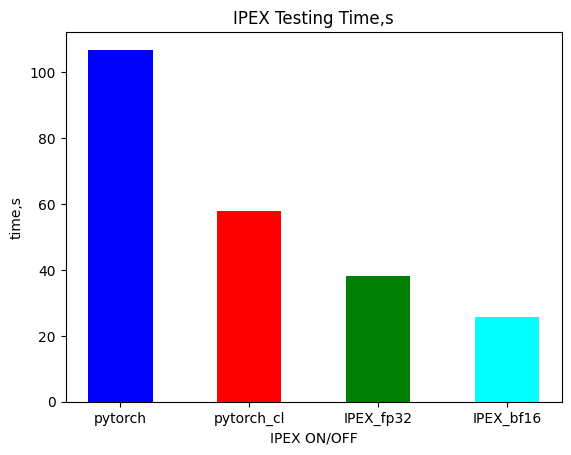

In [114]:
#show performance boost
# time_no_ipex = sum(test_time_list_no_ipex)/len(test_time_list_no_ipex)
# time_no_ipex_c = sum(test_time_list_no_ipex_c)/len(test_time_list_no_ipex_c)
# time_ipex_fp32 = sum(test_time_list_ipex_fp32)/len(test_time_list_ipex_fp32)
# time_ipex_bf16 = sum(test_time_list_ipex_bf16)/len(test_time_list_ipex_bf16)
# time_ipex_bf16_graph = sum(test_time_list_ipex_bf16_graph)/len(test_time_list_ipex_bf16_graph)
# time_ipex_int8 = sum(test_time_list_ipex_in8)/len(test_time_list_ipex_in8)

pred_times = [time_pytorch, time_pytorch_c, time_ipex_fp32, time_ipex_bf16]
tick_label = ['pytorch', 'pytorch_cl', 'IPEX_fp32', 'IPEX_bf16']

left = [1,2,3,4]
plt.bar(left, pred_times, tick_label = tick_label, width = 0.5, color = ['blue', 'red', 'green', 'cyan'])
plt.xlabel('IPEX ON/OFF'); plt.ylabel('time,s'); plt.title('IPEX Testing Time,s')
plt.show()

# print("Performance Speedup Testing: ",(time_test)/(time_test_ipex))

#### Compare Accuracy

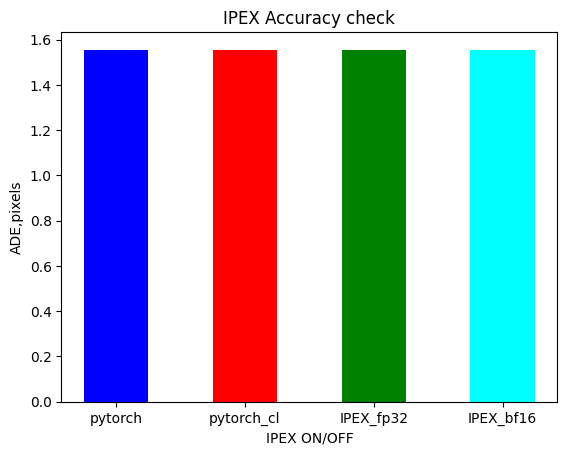

In [115]:
#show accuracy difference
accuracy_diff = [total_ADE, total_ADE_c, total_ADE_fp32, total_ADE_bf16]
tick_label = ['pytorch', 'pytorch_cl', 'IPEX_fp32', 'IPEX_bf16']

left = [1,2,3,4]
plt.bar(left, accuracy_diff, tick_label = tick_label, width = 0.5, color = ['blue', 'red', 'green', 'cyan'])
plt.xlabel('IPEX ON/OFF'); plt.ylabel('ADE,pixels'); plt.title('IPEX Accuracy check')
plt.show()

### Step 12: Run with Intel Extension for PyTorch (IPEX) with bfloat16 dataprecision in graph mode:

In [116]:
model = get_model()

# os.environ["DNNL_VERBOSE"] = "1"
# os.environ["ONEDNN_MAX_CPU_ISA"] = "AVX512_CORE_VNNI"

#with IPEX
import intel_extension_for_pytorch as ipex
model_ipex = ipex.optimize(model, dtype=torch.bfloat16)

with torch.no_grad():
    with torch.cpu.amp.autocast():
        model_ipex = torch.jit.trace(model_ipex, resnet_data)
        model_ipex = torch.jit.freeze(model_ipex)

        for x1 in range(20):
            model_ipex(resnet_data)

Loading checkpoint
Loaded checkpoint at epoch 261


In [117]:
ade_list = []
fde_list = []

f=open(f"{config.plots}/ade-fde.txt","w+")
f.write("seq_id,ade,fde\n")

plot_figures = False
mixedprecision = True
IPEX = True

# validatioon function
ade_list, fde_list, test_time_list_ipex_bf16_graph, prof_pytorch_ipex_bf16_graph = evaluate(model_ipex, test_loader, ade_list, fde_list, f, plot_figures, mixedprecision, channel_last, IPEX)

f.write("total_ADE =" + str(sum(ade_list)/len(ade_list)) +"\n")
f.write("total_FDE =" + str(sum(fde_list)/len(fde_list)) +"\n")
# f.write("total_model_time =" + str(sum(test_time_list_ipex_bf16_graph)/len(test_time_list_ipex_bf16_graph)) +"\n")

print("total_ADE(in pixels) =", sum(ade_list)/len(ade_list))
print("total_FDE(in pixels) =", sum(fde_list)/len(fde_list))
# print("total_model_time(s) =", sum(test_time_list_ipex_bf16_graph)/len(test_time_list_ipex_bf16_graph))

total_ADE_bf16_graph = sum(ade_list)/len(ade_list)
time_ipex_bf16_graph=prof_pytorch_ipex_bf16_graph.self_cpu_time_total/1000
# print(time_ipex_bf16_graph)

f.close()

seq_id, ADE(px), FDE(px) =  6666201 1.635752558708191 3.12973952293396
seq_id, ADE(px), FDE(px) =  7067796 2.580430269241333 5.69028902053833
seq_id, ADE(px), FDE(px) =  7965952 1.7369980812072754 4.705589294433594
seq_id, ADE(px), FDE(px) =  19675067 1.804854154586792 2.2367660999298096
seq_id, ADE(px), FDE(px) =  3316941 1.108931541442871 2.914003849029541
seq_id, ADE(px), FDE(px) =  21126357 0.34131088852882385 1.1352672576904297
seq_id, ADE(px), FDE(px) =  22293277 0.5897068381309509 0.44598105549812317
seq_id, ADE(px), FDE(px) =  17257679 1.466255784034729 2.546072244644165
seq_id, ADE(px), FDE(px) =  1440372 2.731741428375244 5.586955547332764
total_ADE(in pixels) = 1.5551090604729123
total_FDE(in pixels) = 3.154518210225635


In [118]:
#### Get Profiling information with IPEX-bf16-graph

In [119]:
print(prof_pytorch_ipex_bf16_graph.key_averages().table(sort_by='self_cpu_time_total'))

-----------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                           Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-----------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
    ipex_prepack::convolution_bottleneck_run_v1        55.59%       2.929ms        55.59%       2.929ms     244.102us            12  
    ipex_prepack::convolution_bottleneck_run_v2        26.12%       1.376ms        26.29%       1.385ms     346.371us             4  
             ipex_prepack::convolution_relu_run         6.41%     337.721us         9.63%     507.261us     507.261us             1  
                                    aten::copy_         4.14%     218.311us         4.14%     218.311us     109.156us             2  
                                 dil_max_pool2d         2.08% 

#### Export to Chrome Trace (chrome://tracing)

In [120]:
prof_pytorch_ipex_bf16_graph.export_chrome_trace("trace_file_pytorch_ipex_bf16_graph.json")

#### Compare Latency (Batch-size 1)

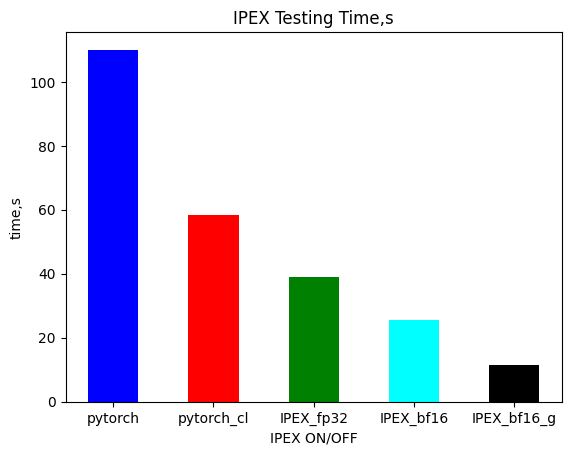

In [74]:
#show performance boost
# time_no_ipex = sum(test_time_list_no_ipex)/len(test_time_list_no_ipex)
# time_no_ipex_c = sum(test_time_list_no_ipex_c)/len(test_time_list_no_ipex_c)
# time_ipex_fp32 = sum(test_time_list_ipex_fp32)/len(test_time_list_ipex_fp32)
# time_ipex_bf16 = sum(test_time_list_ipex_bf16)/len(test_time_list_ipex_bf16)
# time_ipex_bf16_graph = sum(test_time_list_ipex_bf16_graph)/len(test_time_list_ipex_bf16_graph)
# time_ipex_int8 = sum(test_time_list_ipex_in8)/len(test_time_list_ipex_in8)

pred_times = [time_pytorch, time_pytorch_c, time_ipex_fp32, time_ipex_bf16, time_ipex_bf16_graph]
tick_label = ['pytorch', 'pytorch_cl', 'IPEX_fp32', 'IPEX_bf16', 'IPEX_bf16_g']

left = [1,2,3,4,5]
plt.bar(left, pred_times, tick_label = tick_label, width = 0.5, color = ['blue', 'red', 'green', 'cyan', 'black'])
plt.xlabel('IPEX ON/OFF'); plt.ylabel('time,s'); plt.title('IPEX Testing Time,s')
plt.show()

# print("Performance Speedup Testing: ",(time_test)/(time_test_ipex))

#### Compare Accuracy

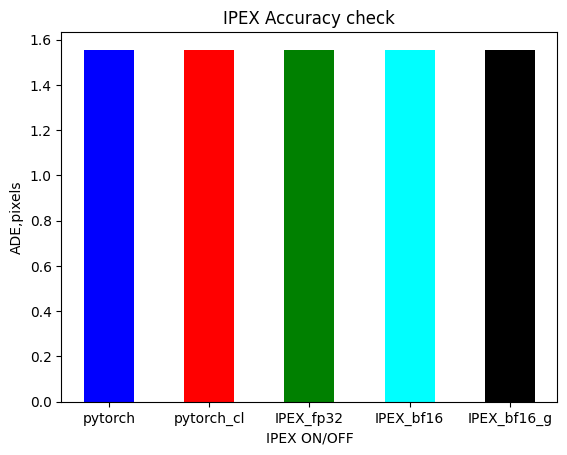

In [121]:
#show accuracy difference
accuracy_diff = [total_ADE, total_ADE_c, total_ADE_fp32, total_ADE_bf16, total_ADE_bf16_graph]
tick_label = ['pytorch', 'pytorch_cl', 'IPEX_fp32', 'IPEX_bf16', 'IPEX_bf16_g']

left = [1,2,3,4,5]
plt.bar(left, accuracy_diff, tick_label = tick_label, width = 0.5, color = ['blue', 'red', 'green', 'cyan', 'black'])
plt.xlabel('IPEX ON/OFF'); plt.ylabel('ADE,pixels'); plt.title('IPEX Accuracy check')
plt.show()

### Step 13: Run with Intel Extension for PyTorch (IPEX) with INT8 after quantization:

In [122]:
model = get_model()

# os.environ["DNNL_VERBOSE"] = "1"
# os.environ["ONEDNN_MAX_CPU_ISA"] = "AVX512_CORE_VNNI"

import intel_extension_for_pytorch as ipex
from intel_extension_for_pytorch.quantization import prepare, convert

# Quantize model to INT8 if needed (one time)
model_filename = "quantized_model_int8.pt"
if not os.path.exists(model_filename):
    qconfig = ipex.quantization.default_static_qconfig
    prepared_model = prepare(model, qconfig, example_inputs=resnet_data, inplace=False)
    converted_model = convert(prepared_model)
    with torch.no_grad():
        traced_model = torch.jit.trace(converted_model, resnet_data)
        traced_model = torch.jit.freeze(traced_model)
        traced_model.save(model_filename)

# Load INT8 model for inference
model_ipex = torch.jit.load(model_filename)
model_ipex.eval()
model_ipex = torch.jit.freeze(model_ipex)

for x1 in range(20):
    model_ipex(resnet_data)

Loading checkpoint
Loaded checkpoint at epoch 261


In [123]:
ade_list = []
fde_list = []

f=open(f"{config.plots}/ade-fde.txt","w+")
f.write("seq_id,ade,fde\n")

plot_figures = False
mixedprecision = False
IPEX = True

# validatioon function
ade_list, fde_list, test_time_list_ipex_in8, prof_pytorch_ipex_in8 = evaluate(model_ipex, test_loader, ade_list, fde_list, f, plot_figures, mixedprecision, channel_last, IPEX)

f.write("total_ADE =" + str(sum(ade_list)/len(ade_list)) +"\n")
f.write("total_FDE =" + str(sum(fde_list)/len(fde_list)) +"\n")
# f.write("total_model_time =" + str(sum(test_time_list_ipex_bf16_graph)/len(test_time_list_ipex_bf16_graph)) +"\n")

print("total_ADE(in pixels) =", sum(ade_list)/len(ade_list))
print("total_FDE(in pixels) =", sum(fde_list)/len(fde_list))
# print("total_model_time(s) =", sum(test_time_list_ipex_bf16_graph)/len(test_time_list_ipex_bf16_graph))

total_ADE_int8 = sum(ade_list)/len(ade_list)
time_ipex_int8=prof_pytorch_ipex_in8.self_cpu_time_total/1000

f.close()

seq_id, ADE(px), FDE(px) =  6666201 6.7514262199401855 7.404562950134277
seq_id, ADE(px), FDE(px) =  7067796 17.66645622253418 36.64912796020508
seq_id, ADE(px), FDE(px) =  7965952 15.083099365234375 34.1176872253418
seq_id, ADE(px), FDE(px) =  19675067 4.279492378234863 12.946266174316406
seq_id, ADE(px), FDE(px) =  3316941 5.0462799072265625 4.101747035980225
seq_id, ADE(px), FDE(px) =  21126357 7.362675666809082 9.263557434082031
seq_id, ADE(px), FDE(px) =  22293277 3.7537050247192383 1.5230838060379028
seq_id, ADE(px), FDE(px) =  17257679 31.197824478149414 62.52909851074219
seq_id, ADE(px), FDE(px) =  1440372 34.191162109375 69.3095703125
total_ADE(in pixels) = 13.925791263580322
total_FDE(in pixels) = 26.427189045482212


#### Get Profiling information with IPEX-int8

In [124]:
print(prof_pytorch_ipex_in8.key_averages().table(sort_by='self_cpu_time_total'))

-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
dequantize+dequantize+dequantize+_convolution+relu+q...        27.72%       1.119ms        28.31%       1.143ms       1.143ms             1  
dequantize+dequantize+_convolution+relu+quantize_per...        18.04%     728.345us        19.30%     779.319us     111.331us             7  
dequantize+dequantize+dequantize+_convolution+relu+q...        17.93%     723.928us        18.45%     744.995us     744.995us             1  
dequantize+dequantize+dequantize+_convolution+relu+q...        12.53%     505.861us        13.00%     525.025us     525.025us             1  
      

#### Export to Chrome Trace (chrome://tracing)

In [125]:
prof_pytorch_ipex_in8.export_chrome_trace("trace_file_pytorch_ipex_int8.json")

#### Compare Latency (Batch-size 1)

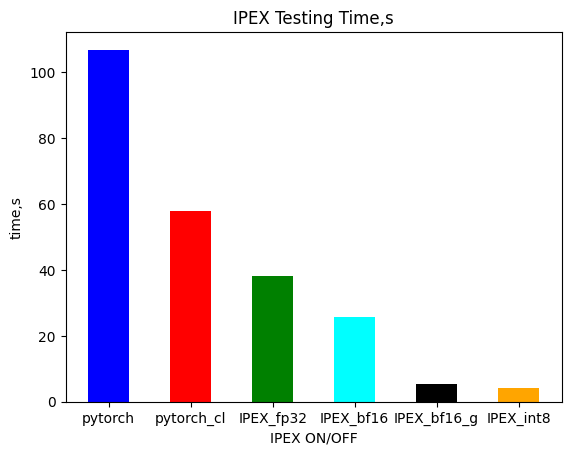

In [126]:
#show performance boost
# time_no_ipex = sum(test_time_list_no_ipex)/len(test_time_list_no_ipex)
# time_no_ipex_c = sum(test_time_list_no_ipex_c)/len(test_time_list_no_ipex_c)
# time_ipex_fp32 = sum(test_time_list_ipex_fp32)/len(test_time_list_ipex_fp32)
# time_ipex_bf16 = sum(test_time_list_ipex_bf16)/len(test_time_list_ipex_bf16)
# time_ipex_bf16_graph = sum(test_time_list_ipex_bf16_graph)/len(test_time_list_ipex_bf16_graph)
# time_ipex_int8 = sum(test_time_list_ipex_in8)/len(test_time_list_ipex_in8)

pred_times = [time_pytorch, time_pytorch_c, time_ipex_fp32, time_ipex_bf16, time_ipex_bf16_graph, time_ipex_int8]
tick_label = ['pytorch', 'pytorch_cl', 'IPEX_fp32', 'IPEX_bf16', 'IPEX_bf16_g', 'IPEX_int8']

left = [1,2,3,4,5,6]
plt.bar(left, pred_times, tick_label = tick_label, width = 0.5, color = ['blue', 'red', 'green', 'cyan', 'black', 'orange'])
plt.xlabel('IPEX ON/OFF'); plt.ylabel('time,s'); plt.title('IPEX Testing Time,s')
plt.show()

# print("Performance Speedup Testing: ",(time_test)/(time_test_ipex))

#### Accuracy comparison

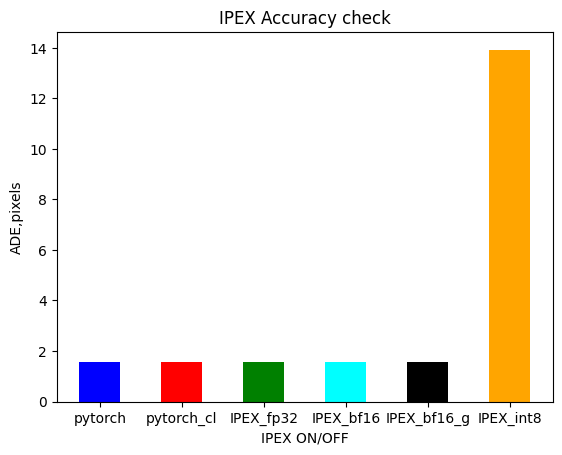

In [127]:
#show accuracy difference
accuracy_diff = [total_ADE, total_ADE_c, total_ADE_fp32, total_ADE_bf16, total_ADE_bf16_graph, total_ADE_int8]
tick_label = ['pytorch', 'pytorch_cl', 'IPEX_fp32', 'IPEX_bf16', 'IPEX_bf16_g', 'IPEX_int8']

left = [1,2,3,4,5,6]
plt.bar(left, accuracy_diff, tick_label = tick_label, width = 0.5, color = ['blue', 'red', 'green', 'cyan', 'black', 'orange'])
plt.xlabel('IPEX ON/OFF'); plt.ylabel('ADE,pixels'); plt.title('IPEX Accuracy check')
plt.show()

### Step 14: Runtime optimization with ipexrun on 4 cores 

Default primitives of PyTorch and IPEX are highly optimized, there are things users can do improve performance. Setting configuration options properly contributes to a performance boost. However, there is no unified configuration that is optimal to all topologies. Users need to try different combinations by themselves.



**Single instance for inference**

The launch script is provided as a module of IPEX. Below are some of those configurations that can be set using the launch script for a single instance. The launch script can be run as a shell command from a Jupyter notebook or from the shell itself.

It is recommended that the user check the output of [htop](https://htop.dev/) in an accompanying terminal to check the usage of cores while running the cells below. The output from htop looks as shown below.

In [130]:
!source /opt/intel/oneapi/setvars.sh;source ~/akashd/miniconda3/bin/activate;conda activate tp;ipexrun --ninstances 1 --ncore_per_instance 5 --log_path ./logs ./TP_bf16.py

 
:: WARNING: setvars.sh has already been run. Skipping re-execution.
   To force a re-execution of setvars.sh, use the '--force' option.
   Using '--force' can result in excessive use of your environment variables.
  
usage: source setvars.sh [--force] [--config=file] [--help] [...]
  --force        Force setvars.sh to re-run, doing so may overload environment.
  --config=file  Customize env vars using a setvars.sh configuration file.
  --help         Display this help message and exit.
  ...            Additional args are passed to individual env/vars.sh scripts
                 and should follow this script's arguments.
  
  Some POSIX shells do not accept command-line options. In that case, you can pass
  command-line options via the SETVARS_ARGS environment variable. For example:
  
  $ SETVARS_ARGS="ia32 --config=config.txt" ; export SETVARS_ARGS
  $ . path/to/setvars.sh
  
  The SETVARS_ARGS environment variable is cleared on exiting setvars.sh.
  
2023-07-12 09:49:48,220 - inte

####  By increasing the number of cores, we can see an improvement in the inference time as shown below 

In [131]:
!source /opt/intel/oneapi/setvars.sh;source ~/akashd/miniconda3/bin/activate;conda activate tp;ipexrun --ninstances 1 --ncore_per_instance 10 --log_path ./logs ./TP_bf16.py

 
:: WARNING: setvars.sh has already been run. Skipping re-execution.
   To force a re-execution of setvars.sh, use the '--force' option.
   Using '--force' can result in excessive use of your environment variables.
  
usage: source setvars.sh [--force] [--config=file] [--help] [...]
  --force        Force setvars.sh to re-run, doing so may overload environment.
  --config=file  Customize env vars using a setvars.sh configuration file.
  --help         Display this help message and exit.
  ...            Additional args are passed to individual env/vars.sh scripts
                 and should follow this script's arguments.
  
  Some POSIX shells do not accept command-line options. In that case, you can pass
  command-line options via the SETVARS_ARGS environment variable. For example:
  
  $ SETVARS_ARGS="ia32 --config=config.txt" ; export SETVARS_ARGS
  $ . path/to/setvars.sh
  
  The SETVARS_ARGS environment variable is cleared on exiting setvars.sh.
  
2023-07-12 09:50:06,869 - inte